### Importing Libraries

  - `pandas` as `pd` for data manipulation and analysis.
  - `numpy` as `np` for numerical operations.
  - `matplotlib.pyplot` as `plt` for creating visualizations.
  - `ast` for safely evaluating strings into python objects.
  - `seaborn` as `sns` for statistical data visualization and enhanced plotting.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast  
import seaborn as sns

### Loading Data

- **Reading CSV File:** reading a csv file into a dataframe named `df`, which is used for data analysis and manipulation.


In [4]:
df = pd.read_csv(r'D:\Python\Files\data_jobs.csv')
df.sample(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
294876,Data Engineer,Data Engineer - W2 Contract Role,Anywhere,via LinkedIn,Contractor,True,"Texas, United States",2023-07-07 17:09:27,True,False,United States,NaN,NaN,NaN,E Computer Technologies Inc,"['sql', 'aws', 'spark']","{'cloud': ['aws'], 'libraries': ['spark'], 'pr..."
490276,Senior Data Analyst,Senior Data Analyst - X Delivery,"Bogotá, Bogota, Colombia",via Boston Consulting Group,Full-time,False,Colombia,2023-03-23 11:35:29,False,False,Colombia,NaN,NaN,NaN,"BCG GAMMA, Boston Consulting Group","['python', 'r', 'sql', 'sas', 'sas', 'redshift...","{'analyst_tools': ['sas', 'alteryx', 'tableau'..."


### Data Cleanup

- **Renaming Columns:** assigning new column names to the dataframe.

- **Converting Dates:** using `pd.to_datetime()` to change the 'posted_dt' column from string to datetime format.

- **Converting Skills:**
  - using `.apply() `function to convert 'skills' from string to list format by applying a custom function to  every row of a dataFrame.
  - using `ast.literal_eval()` to evaluate and convert strings to python objects.
  - ensuring conversion only happens if the value is not missing using `pd.notna(gg)`.

- **Handling Missing Values:** optionally dropping rows with missing values in the 'salyr' column using `df.dropna()` (commented out).

In [5]:
new_columns = ['job', 'full_name', 'location', 'via', 'schedule', 'work_from_home','search_location','posted_dt','no_degree','health_ins','country','salrate','salyr','salhr','company','skills','skilltype']
df.columns = new_columns

# data clean up
df['posted_dt'] = pd.to_datetime(df['posted_dt']) 
df['skills'] = df['skills'].apply(lambda gg: ast.literal_eval(gg) if pd.notna(gg) else gg)
df.dropna(subset=['salyr'],inplace=True)

### Sample

- Random sample of 2 rows from the modified dataFrame `df`

In [6]:
df.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
440233,Data Engineer,Python Data Engineer,"Atlanta, GA",via LinkedIn,Full-time,False,"New York, United States",2023-12-29 16:05:41,True,True,United States,year,120000.0,NaN,LTI - Larsen & Toubro Infotech,"[python, snowflake, aws]","{'cloud': ['snowflake', 'aws'], 'programming':..."
407464,Data Analyst,Partner Data Analyst,"Herzliya, Israel",via Ai-Jobs.net,Full-time,False,Israel,2023-02-16 16:28:12,False,False,Israel,year,111175.0,NaN,AppsFlyer,"[sql, python, go]","{'programming': ['sql', 'python', 'go']}"


# For USA

### Identifying Top 6 Job Titles

- **Filtering DataFrame:** filtering the dataframe to include only rows where the `country` is `'United States'`, creating a new dataframe `df_us`.

- **Finding Top Job Titles:** finding the top six most common job titles in `df_us` by counting occurrences and selecting the most frequent ones. converting these job titles to a list and assigning it to `top6_jobs`.


In [7]:
df_us = df[df['country']== 'United States'].copy()
top6_jobs = df_us['job'].value_counts().head(6).index.to_list()
top6_jobs

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

### Filtering 

- **Filtering DataFrame:** filtering the `df_us` dataframe to include only rows where the `job` is one of the top six job titles listed in `top6_jobs`, creating a new dataframe `df_us_top6_jobs`.


In [8]:
df_us_top6_jobs = df_us[df_us['job'].isin(top6_jobs)]
df_us_top6_jobs.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
436178,Senior Data Scientist,"Senior Data Scientist (Greater Boston Area, MA)","Boston, MA",via Built In Boston,Full-time,False,"New York, United States",2023-01-07 16:02:13,False,True,United States,year,193499.0,NaN,Motional,NaN,NaN
141233,Data Scientist,Lead Data Scientist - Digital Data Science/Wea...,"Lexington, SC",via Ladders,Full-time,False,Georgia,2023-03-11 09:07:55,False,False,United States,year,125000.0,NaN,Novo Nordisk US,"[sql, nosql]","{'programming': ['sql', 'nosql']}"


### Grouping and Sorting

- **Grouping and Calculating Median Salary:** grouping the `df_us_top6_jobs` dataframe by the `job` column and calculating the median salary (`salyr`) for each job title.

- **Sorting Job Titles:** sorting these job titles by median salary in descending order.

- **Converting to List:** converting the sorted job titles to a list named `order_us`.


In [9]:
order_us = df_us_top6_jobs.groupby('job')['salyr'].agg('median').sort_values(ascending=False).index.to_list()
order_us

['Senior Data Scientist',
 'Senior Data Engineer',
 'Data Scientist',
 'Data Engineer',
 'Senior Data Analyst',
 'Data Analyst']

### Plotting

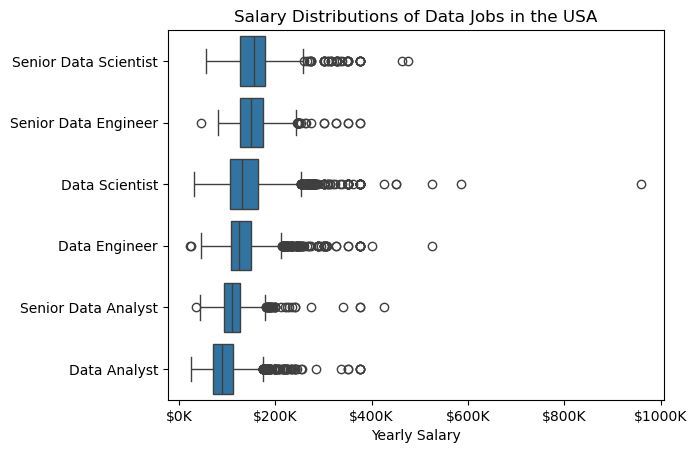

In [10]:
# Creating Plot
sns.boxplot(data=df_us_top6_jobs , x= 'salyr', y= 'job', order=(order_us))

# Modifying Axes and Labels
ax= plt.gca() # to get the current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')) # to convert 100000 to $100k at x-axis
plt.title('Salary Distributions of Data Jobs in the USA')
plt.xlabel('Yearly Salary')
plt.ylabel('')

# Displaying the plot
plt.show()


# For India 

### Identifying Top 6 Job Titles 

- **Filtering DataFrame:** filtering the dataframe to include only rows where the `country` is `'India'`, creating a new dataframe `df_ind`.

- **Finding Top Job Titles:** finding the top six most common job titles in `df_ind` by counting occurrences and selecting the most frequent ones. converting these job titles to a list and assigning it to `top6_jobs`.


In [11]:
df_ind = df[df['country']== 'India'].copy()
top6_jobs_ind = df_ind['job'].value_counts().head(6).index.to_list()
top6_jobs_ind

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

### Filtering 

- **Filtering DataFrame:** filtering the `df_ind` dataframe to include only rows where the `job` is one of the top six job titles listed in `top6_jobs`, creating a new dataframe `df_ind_top6_jobs`.


In [12]:
df_ind_top6_jobs = df_ind[df_ind['job'].isin(top6_jobs)]
df_ind_top6_jobs.sample(2)

,job,full_name,location,via,schedule,work_from_home,search_location,posted_dt,no_degree,health_ins,country,salrate,salyr,salhr,company,skills,skilltype
512324,Senior Data Scientist,Master Data Manager,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-18 11:13:37,False,False,India,year,105650.0,NaN,Sinch,NaN,NaN
773374,Data Engineer,Data Engineer,"Chennai, Tamil Nadu, India",via Ai-Jobs.net,Full-time,False,India,2023-06-27 01:12:16,True,False,India,year,147500.0,NaN,Smartek21.com,"[python, sql, java, mongodb, mongodb, scala, m...","{'databases': ['mongodb', 'mysql', 'postgresql..."


### Grouping and Sorting

- **Grouping and Calculating Median Salary:** grouping the `df_ind_top6_jobs` dataframe by the `job` column and calculating the median salary (`salyr`) for each job title.

- **Sorting Job Titles:** sorting these job titles by median salary in descending order.

- **Converting to List:** converting the sorted job titles to a list named `order_ind`.


In [13]:
order_ind = df_ind_top6_jobs.groupby('job')['salyr'].agg('median').sort_values(ascending=False).index.to_list()
order_ind

['Senior Data Scientist',
 'Data Engineer',
 'Senior Data Engineer',
 'Data Scientist',
 'Senior Data Analyst',
 'Data Analyst']

### Plotting

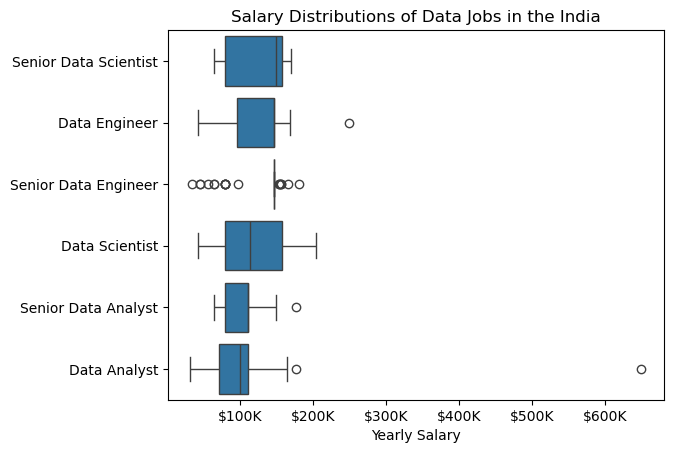

In [14]:
# Creating Plot
sns.boxplot(data=df_ind_top6_jobs , x= 'salyr', y= 'job', order=(order_ind))

# Modifying Axes and Labels
ax= plt.gca() # to get the current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')) # to convert 100000 to $100k at x-axis
plt.title('Salary Distributions of Data Jobs in the India')
plt.xlabel('Yearly Salary')
plt.ylabel('')

# Displaying the plot
plt.show()


# Combined Plot

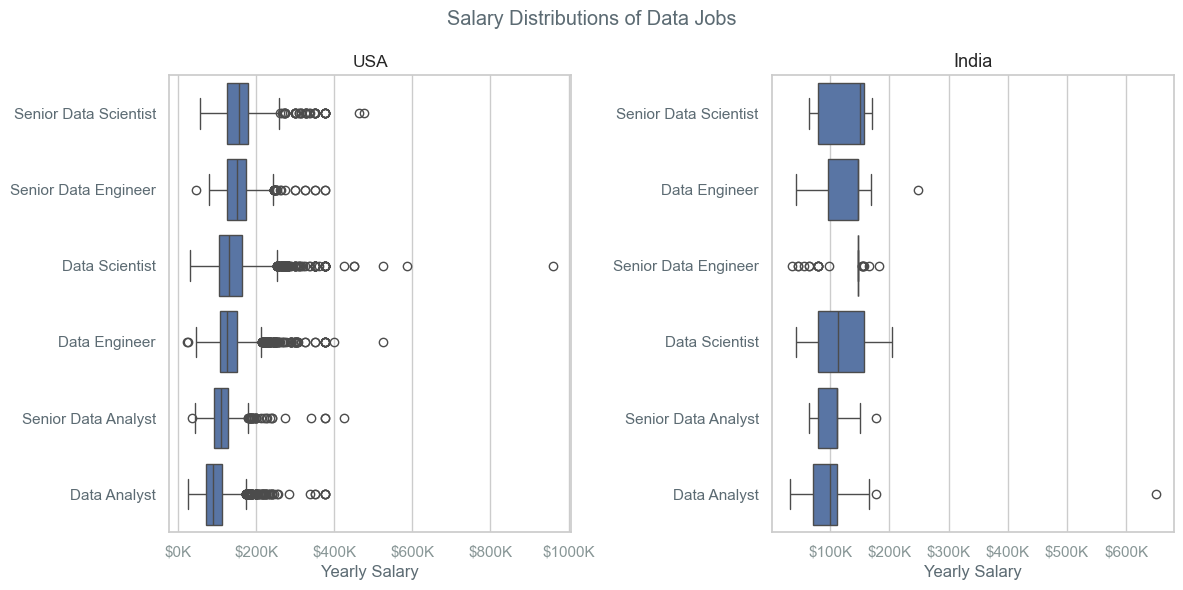

In [15]:

salaries = [df_us_top6_jobs,df_ind_top6_jobs]
orders = [order_us,order_ind]

# Setting Up for Plot
sns.set_theme(style='whitegrid')
fig,ax = plt.subplots(1,len(salaries), figsize = (12,6))

# Creating Plot
for i,salary in enumerate(salaries) :
    sns.boxplot(data=salary , x= 'salyr', y= 'job', order=(orders[i]), ax=ax[i])

    # Modifying Axes and Labels
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')) # to convert 100000 to $100k at x-axis
    ax[0].set_title('USA', fontsize = 12.5)
    ax[1].set_title('India', fontsize = 13)
    ax[i].set_xlabel('Yearly Salary', color = '#5c6b73')
    ax[i].set_ylabel('')
    ax[i].tick_params(axis='x', labelcolor='#889696')
    ax[i].tick_params(axis='y', labelcolor='#5c6b73')

# Modifying the entire figure
plt.suptitle('Salary Distributions of Data Jobs', color = '#5c6b73')

# Displaying the plot
plt.tight_layout()
plt.show()

<span style="color:#d7ba7d; font-size:50px;"> End </span>

---